In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#Checking for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


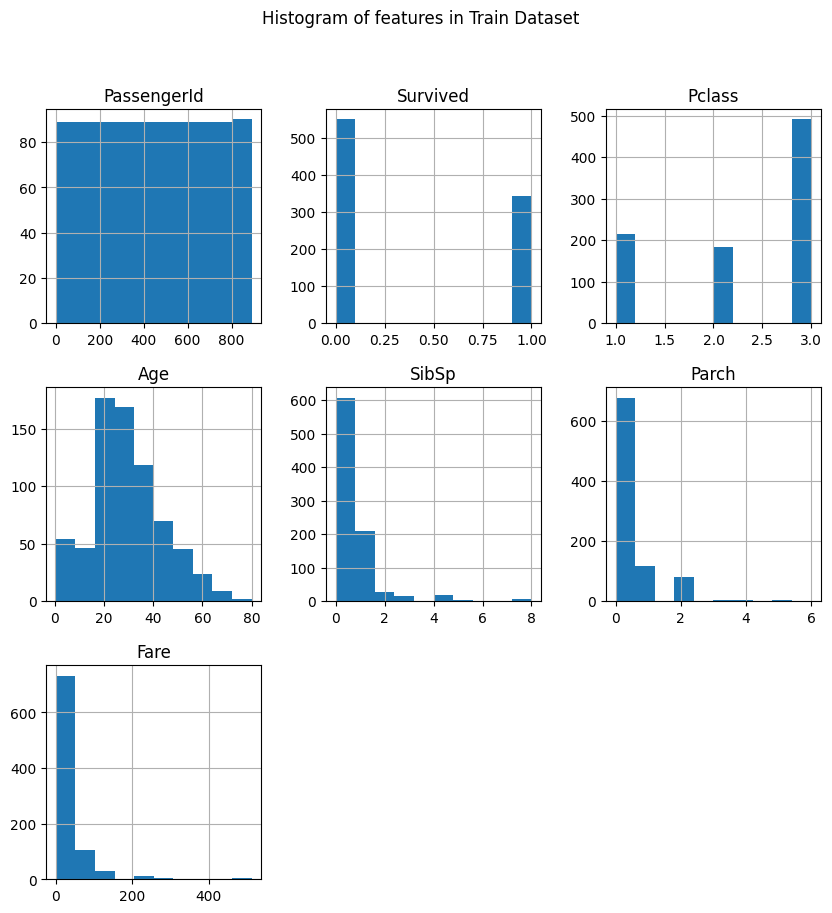

In [5]:
#Data visualization
#Histogram
train_df.hist(figsize=(10,10))
plt.suptitle("Histogram of features in Train Dataset")
plt.show()

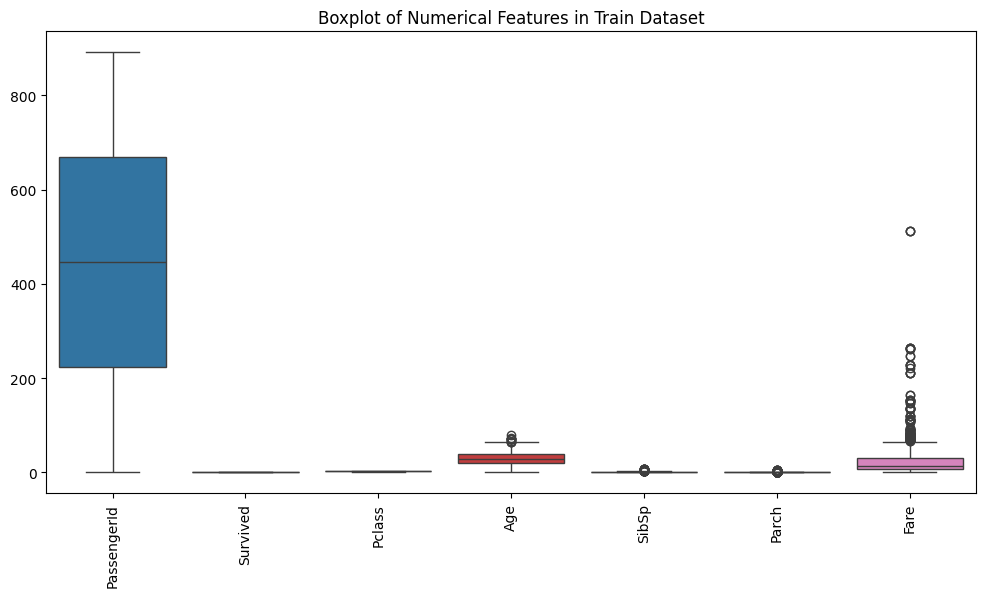

In [6]:
#Box plots
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Features in Train Dataset')
plt.xticks(rotation=90)
plt.show()

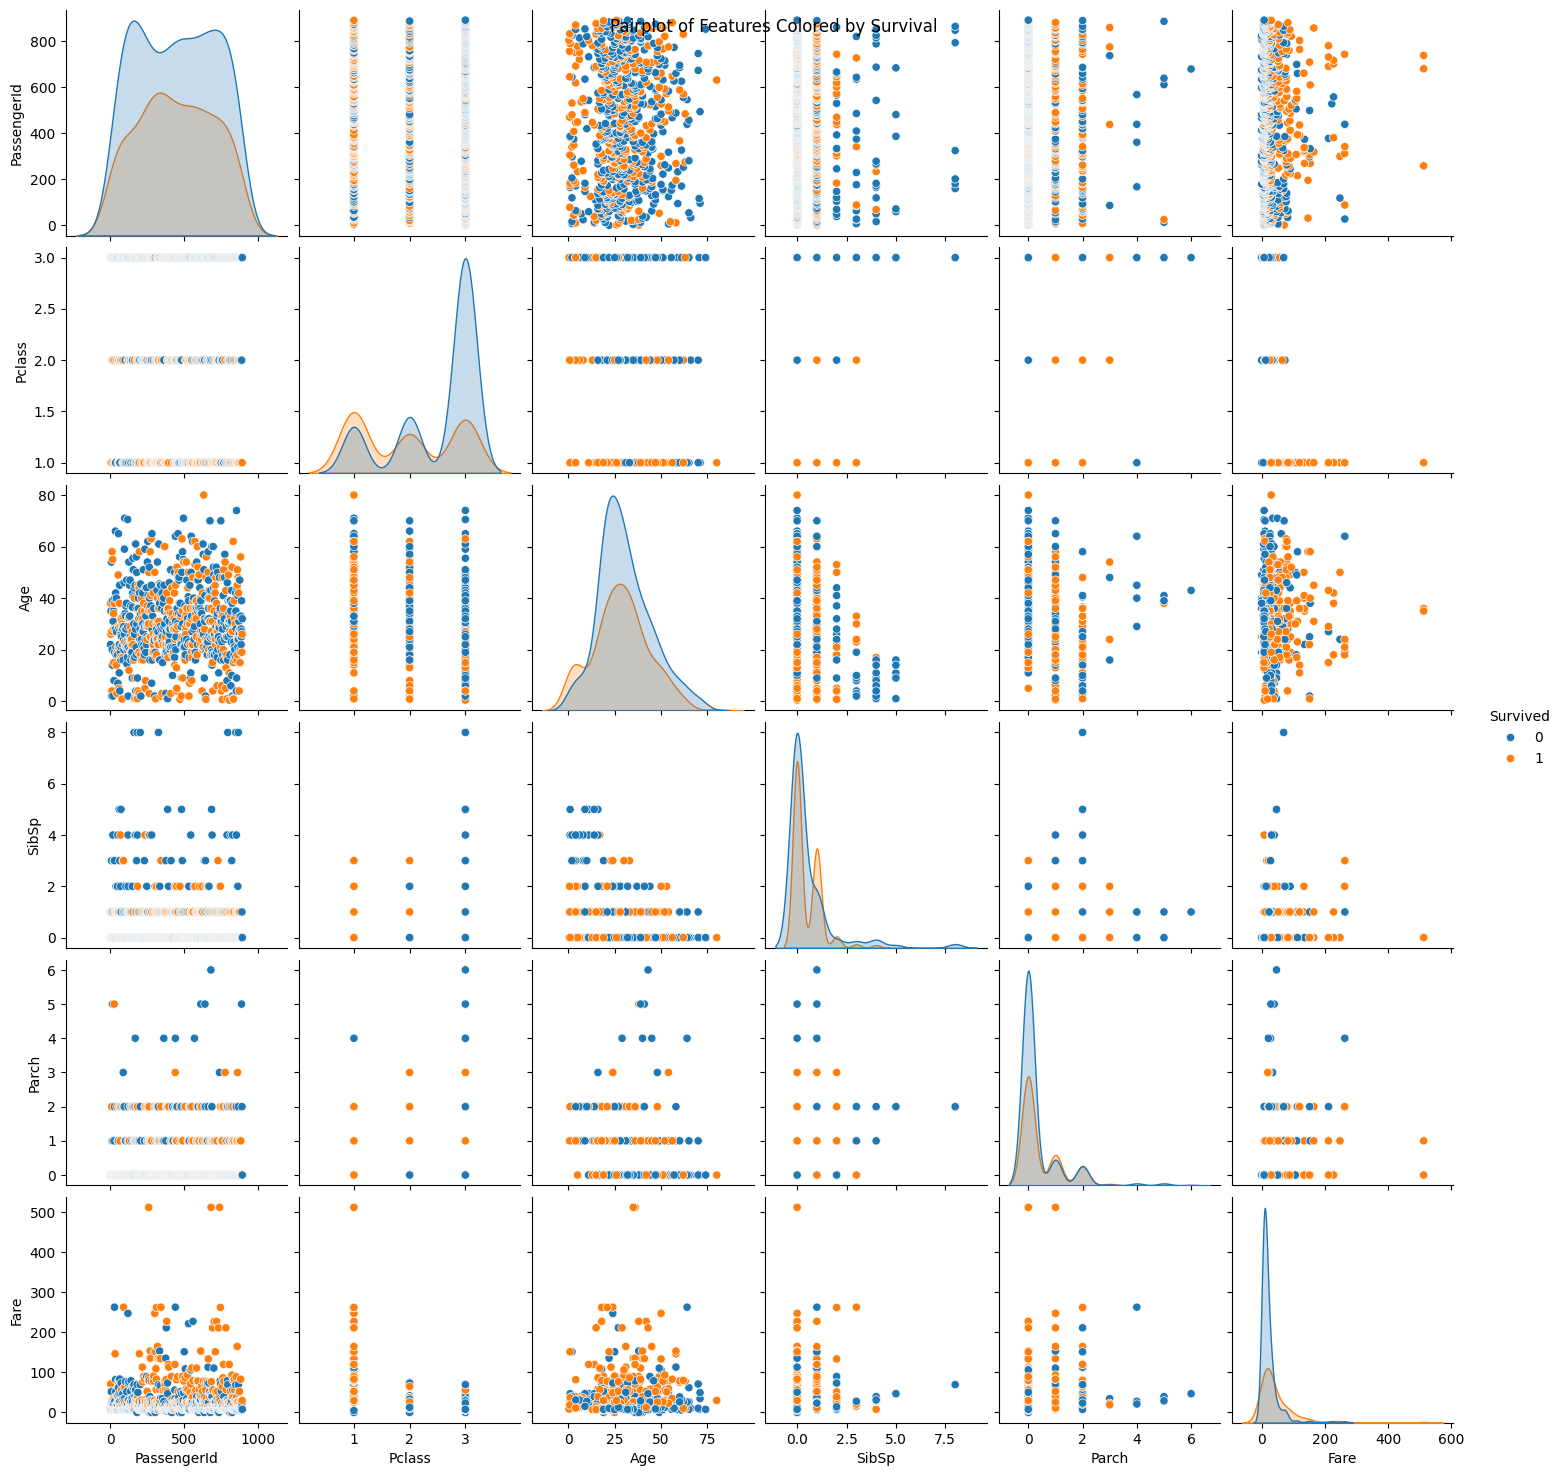

In [7]:
# Visualizing the relationships between features and survival
sns.pairplot(train_df, hue='Survived')
plt.suptitle('Pairplot of Features Colored by Survival')
plt.show()

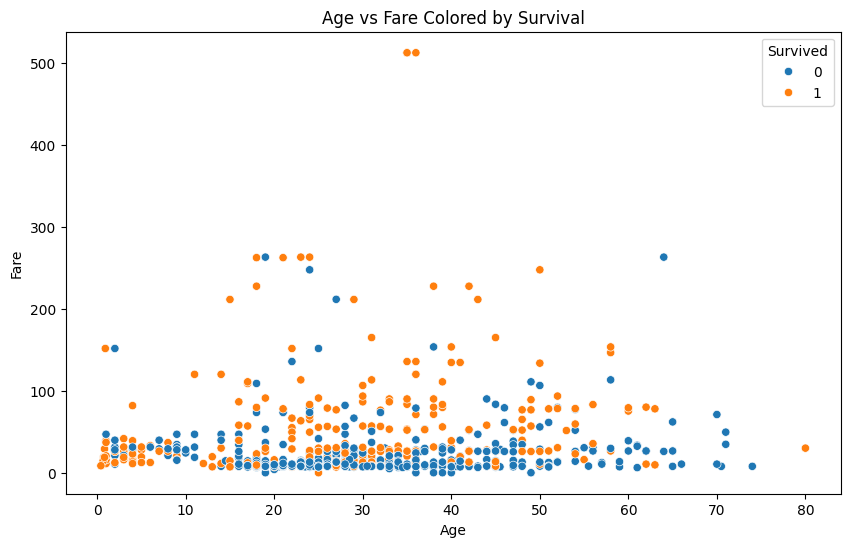

In [8]:
#Scatter plot for Age vs Fare colored by Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare Colored by Survival')
plt.show()

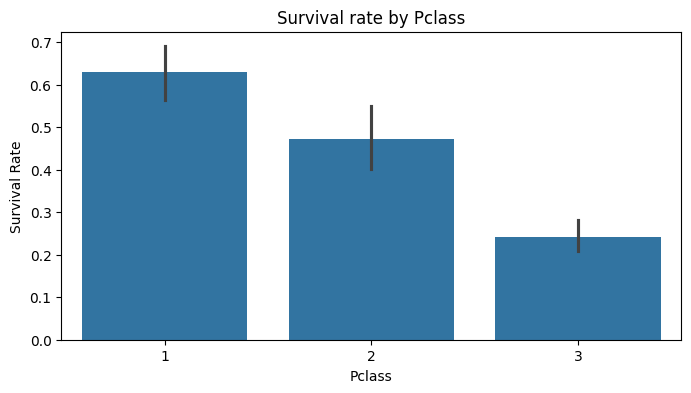

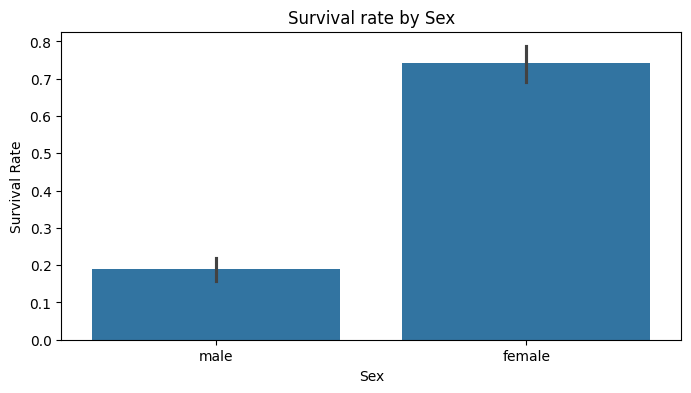

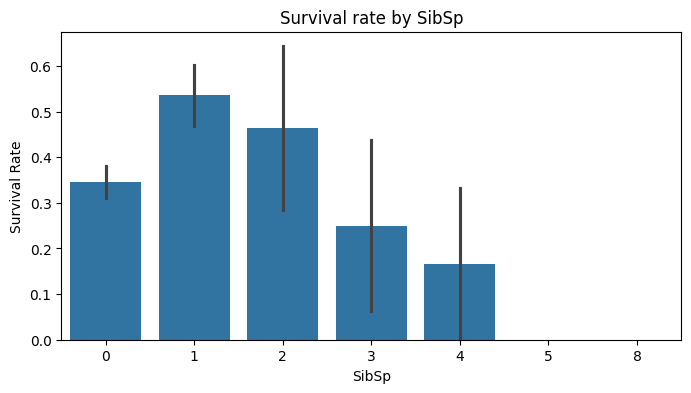

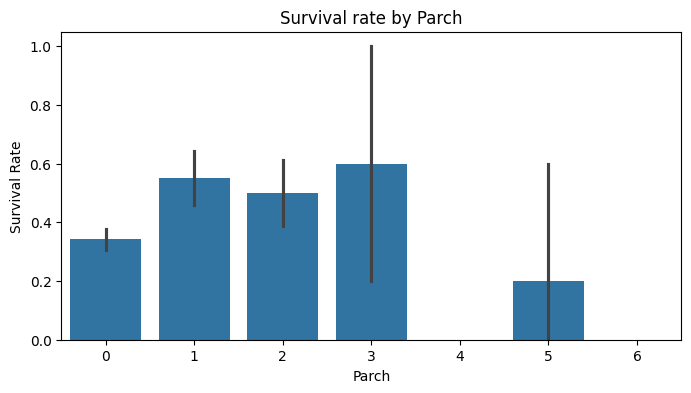

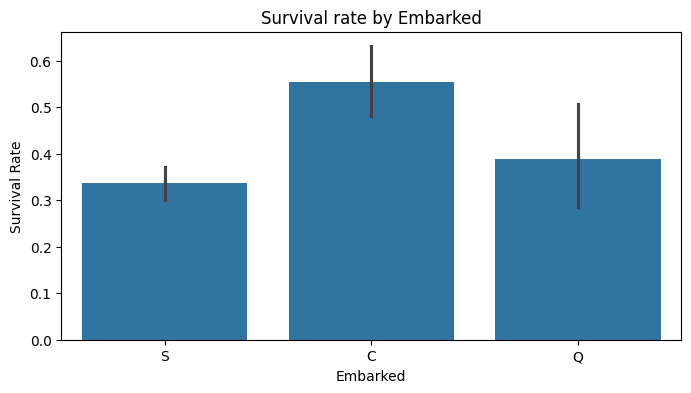

In [9]:
# Bar plot for categorical features
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=train_df[feature], y=train_df['Survived'])
    plt.title(f'Survival rate by {feature}')
    plt.ylabel('Survival Rate')
    plt.show()

In [10]:
# Data Preprocessing
# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [11]:
# Encode categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

In [12]:
# Drop columns that won't be used
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
# Ensure both datasets have the same columns
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
x_test = test_df

In [14]:
x_train

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,22.0,7.2500,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,38.0,71.2833,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,26.0,7.9250,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,4,35.0,53.1000,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,35.0,8.0500,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,13.0000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
887,888,19.0,30.0000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
888,889,28.0,23.4500,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
889,890,26.0,30.0000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
x_test

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
0,892,34.5,7.8292,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,47.0,7.0000,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,62.0,9.6875,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,27.0,8.6625,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,22.0,12.2875,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,8.0500,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,1306,39.0,108.9000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,1307,38.5,7.2500,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,1308,27.0,8.0500,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0
x_test = x_test[x_train.columns]

In [18]:
!pip install dask

In [19]:
# Building Predictive Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
x_train_split, x_valid, y_train_split, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_split, x_valid, y_train_split, y_valid

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


(     PassengerId   Age      Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  \
 331          332  45.5   28.5000     False     False      True    False   
 733          734  23.0   13.0000      True     False      True    False   
 382          383  32.0    7.9250     False      True      True    False   
 704          705  26.0    7.8542     False      True      True     True   
 813          814   6.0   31.2750     False      True     False    False   
 ..           ...   ...       ...       ...       ...       ...      ...   
 106          107  21.0    7.6500     False      True     False    False   
 270          271  28.0   31.0000     False     False      True    False   
 860          861  41.0   14.1083     False      True      True    False   
 435          436  14.0  120.0000     False     False     False     True   
 102          103  21.0   77.2875     False     False      True    False   
 
      SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_1  Parch_2  Parch_3  \
 331  

In [20]:
# Evaluation metrics
def evaluate_model(model, x_valid, y_valid):
    y_pred = model.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)
    return accuracy, precision, recall, f1, cm

In [21]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train_split, y_train_split)
lgb_metrics = evaluate_model(lgb_model, x_valid, y_valid)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [22]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_split, y_train_split)
xgb_metrics = evaluate_model(xgb_model, x_valid, y_valid)

In [23]:
print("LightGBM Metrics:", lgb_metrics)

LightGBM Metrics: (0.8212290502793296, 0.8088235294117647, 0.7432432432432432, 0.7746478873239436, array([[92, 13],
       [19, 55]]))


In [24]:
print("XGBoost Metrics:", xgb_metrics)

XGBoost Metrics: (0.7877094972067039, 0.7571428571428571, 0.7162162162162162, 0.736111111111111, array([[88, 17],
       [21, 53]]))


In [25]:
# Comparative Analysis
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': lgb_metrics[:-1],
    'XGBoost': xgb_metrics[:-1]
})
print(metrics_df)

      Metric  LightGBM   XGBoost
0   Accuracy  0.821229  0.787709
1  Precision  0.808824  0.757143
2     Recall  0.743243  0.716216
3   F1 Score  0.774648  0.736111


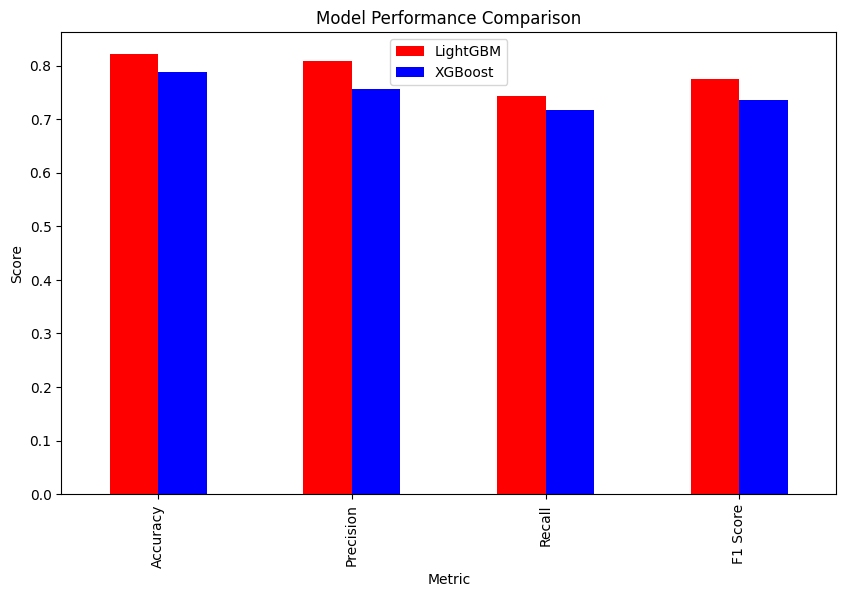

In [26]:
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6),color=['red','blue'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

In [27]:
# Hyperparameter Tuning and Cross-Validation
# LightGBM Hyperparameter Tuning
lgb_params = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

In [28]:
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(x_train_split, y_train_split)
best_lgb_model = lgb_grid.best_estimator_
best_lgb_metrics = evaluate_model(best_lgb_model, x_valid, y_valid)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [29]:
#XGBoost Hyperparameter Tuning
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

In [30]:
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(x_train_split, y_train_split)
best_xgb_model = xgb_grid.best_estimator_
best_xgb_metrics = evaluate_model(best_xgb_model, x_valid, y_valid)

In [31]:
print(f"Best LightGBM Metrics: {best_lgb_metrics}")
print(f"Best XGBoost Metrics: {best_xgb_metrics}")

Best LightGBM Metrics: (0.8324022346368715, 0.8142857142857143, 0.7702702702702703, 0.7916666666666666, array([[92, 13],
       [17, 57]]))
Best XGBoost Metrics: (0.8100558659217877, 0.8125, 0.7027027027027027, 0.7536231884057971, array([[93, 12],
       [22, 52]]))
